## extract stock sentiment from news headline


We are in the age of the internet and social media. Hence, we can tackle the emotion of people towards each busines that have an impact on the motion of stock price. This project is aims to find the sentiment from the newsheadline may be useful for the stock price prediction.

We will use the news headline insight from the FINVIZ.com. Emotion analysis can predict whether people feel good or bad about the company,hence this information can be useful in predicting the direction of change in stock price.

## import useful library

In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...


## web scraping 

we can select the ticket of stock that we want to collect the news headline data 

In [24]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [25]:
news_table

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Jun-11-22 08:20AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/06/11/this-fitness-stock-just-had-banner-month-peloton/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">This Fitness Stock Just Had a Banner Month. Does That Make It a Buy?</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
<tr><td align="right" width="130">12:00AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.wsj.com/articles/meta-morphosis-or-more-pain-possible-futures-for-facebooks-parent-company-11654920026?mod=itp_wsj" target="_blank">Me

Parse the Date, Time and News Headlines into a Python List

In [7]:
parsed_news = []
# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element
        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Jun-11-22',
  '08:30AM',
  '3 Warren Buffett Stocks to Buy Before the Next Bull Market'],
 ['AMZN',
  'Jun-11-22',
  '07:00AM',
  'E-Commerce Growth Has Slowed. Heres How Amazon Can Still Capitalize.'],
 ['AMZN',
  'Jun-11-22',
  '06:10AM',
  'Should You Buy This Stock Split With 64% Upside According to Wall Street?'],
 ['AMZN',
  'Jun-11-22',
  '06:00AM',
  'Why Is Everyone Talking About Amazon Stock?'],
 ['AMZN',
  'Jun-11-22',
  '05:30AM',
  "China's hostile environment for Western tech pushed out Amazon and Airbnb, but competition remains the biggest challenge"],
 ['AMZN',
  'Jun-11-22',
  '01:00AM',
  "Online shoppers battling 'explosion' in Amazon scams"],
 ['AMZN',
  'Jun-10-22',
  '08:17PM',
  'Tesla Files for a 3-for-1 Stock Split. Will It Fuel a Bounce?'],
 ['AMZN',
  'Jun-10-22',
  '07:52PM',
  'What Amazons Virtual Sneaker Try-ons Mean for\xa0Fashion'],
 ['AMZN',
  'Jun-10-22',
  '05:53PM',
  'Microsoft is planting the seeds for cloud gaming supremacy'],
 ['AMZ

## sentiment analysis with NLTK model

Let's now make NLTK think like a financial journalist by adding some new words and sentiment values to our lexicon.

We have to make NLTK model think like a financial journalist, since the headline usually contains the jargons that have special meaning when it comes to financial headlines. 

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

In [12]:
#Then use the model to predict the sentiment score of parsed dataset
import pandas as pd
columns = ['ticker', 'date', 'time', 'headline']
scored_news = pd.DataFrame(parsed_news, columns = columns)
scores = [vader.polarity_scores(headline) for headline in scored_news.headline.values]
scores_df = pd.DataFrame(scores)
scored_news = pd.concat([scored_news, scores_df], axis = 1)
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date

In [13]:
scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2022-06-11,08:30AM,3 Warren Buffett Stocks to Buy Before the Next...,0.000,1.000,0.000,0.0000
1,AMZN,2022-06-11,07:00AM,E-Commerce Growth Has Slowed. Heres How Amazon...,0.000,0.650,0.350,0.5106
2,AMZN,2022-06-11,06:10AM,Should You Buy This Stock Split With 64% Upsid...,0.000,1.000,0.000,0.0000
3,AMZN,2022-06-11,06:00AM,Why Is Everyone Talking About Amazon Stock?,0.000,0.779,0.221,0.1779
4,AMZN,2022-06-11,05:30AM,China's hostile environment for Western tech p...,0.097,0.753,0.151,-0.0000
...,...,...,...,...,...,...,...,...
295,GOOG,2022-06-06,06:37PM,3 Tech Stocks Investors Should Always Buy Duri...,0.259,0.741,0.000,-0.4215
296,GOOG,2022-06-06,06:03PM,Zoom Video Communications taps Google Cloud ex...,0.000,1.000,0.000,0.0000
297,GOOG,2022-06-06,05:21PM,"Apple Debuts Pay-Later Service, iPhone Updates...",0.000,1.000,0.000,0.0000
298,GOOG,2022-06-06,04:53PM,YouTube star Logan Paul weighs in on blockchai...,0.000,1.000,0.000,0.0000


In [14]:
#here we see that we gain the sentiment analysis 

<AxesSubplot:xlabel='date'>

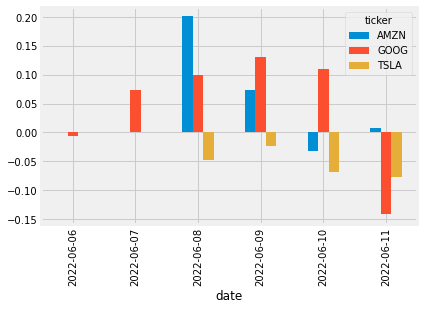

In [16]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
mean_c = scored_news.groupby(['date', 'ticker']).mean()
mean_c = mean_c.unstack(level=1)
mean_c = mean_c.xs('compound', axis = 1)
mean_c.plot.bar()

We see that there is someday that amazon and google data have significantly more positive or negative than other days.
It may be that there are duplicate headlines, let's modify the data again to drop duplicates headline.

In [17]:

# Count the number of headlines in scored_news (store as integer)
num_news_before = len(scored_news.headline)
# Drop duplicates based on ticker and headline
scored_news_clean = scored_news.drop_duplicates(subset = ['ticker', 'headline'])
# Count number of headlines after dropping duplicates
num_news_after = len(scored_news_clean.headline)
# Print before and after numbers to get an idea of how we did 
f"Before we had {num_news_before} headlines, now we have {num_news_after}"

'Before we had 300 headlines, now we have 293'

<AxesSubplot:xlabel='date'>

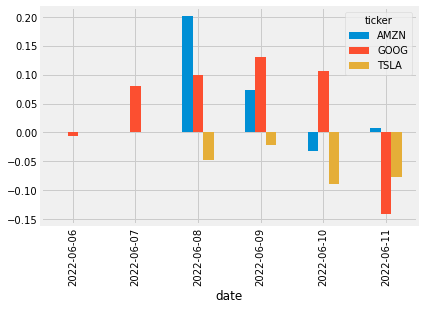

In [19]:
#plot again
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
mean_c = scored_news_clean.groupby(['date', 'ticker']).mean()
mean_c = mean_c.unstack(level=1)
mean_c = mean_c.xs('compound', axis = 1)
mean_c.plot.bar()

we see that there is no change in sentiment analysis at all after dropping the data.